In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random

import tensorflow as tf

from tensorflow.keras import  layers, models
import matplotlib.pyplot as plt
from sklearn import datasets, neural_network, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import tensorflow_probability as tfp


In [2]:
digits = datasets.load_digits()
digits.images = (digits.images - np.min(digits.images, 0))/ (np.max(digits.images, 0) + 0.0001)
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
train_x, test_x, train_y, test_y = train_test_split(data, digits.target, test_size=0.2, shuffle=False)

In [3]:
train_x.shape

(1437, 64)

In [4]:
rbm1 = neural_network.BernoulliRBM(100, learning_rate=0.06, n_iter=100, verbose=0, random_state=101)
rbm2 =  neural_network.BernoulliRBM(80, learning_rate=0.06, n_iter=100, verbose=0, random_state=101)
rbm3 = neural_network.BernoulliRBM(60, learning_rate=0.06, n_iter=100, verbose=0, random_state=101)
rbm4 = neural_network.BernoulliRBM(50, learning_rate=0.06, n_iter=100, verbose=0, random_state=101)
rbm5 = neural_network.BernoulliRBM(40, learning_rate=0.06, n_iter=100, verbose=0, random_state=101)
rbm6 = neural_network.BernoulliRBM(30, learning_rate=0.06, n_iter=100, verbose=0, random_state=101)
rbm7 = neural_network.BernoulliRBM(20, learning_rate=0.06, n_iter=100, verbose=0, random_state=101)
rbm8 = neural_network.BernoulliRBM(10, learning_rate=0.06, n_iter=100, verbose=0, random_state=101)



lr = linear_model.LogisticRegression(solver = "lbfgs", max_iter=1000)

dbn2 = Pipeline(steps=[("rbm1", rbm1), ("rbm2", rbm2), ("lr", lr)])

dbn3 = Pipeline(steps=[("rbm1", rbm1), ("rbm2", rbm2), ("rbm3", rbm3), ("lr", lr)])

dbn4 = Pipeline(steps=[("rbm1", rbm1), ("rbm2", rbm2), ("rbm3", rbm3),("rbm4", rbm4), ("lr", lr)])

dbn5 = Pipeline(steps=[("rbm1", rbm1), ("rbm2", rbm2), ("rbm3", rbm3),("rbm4", rbm4),("rbm5", rbm5), ("lr", lr)])

dbn6 = Pipeline(steps=[("rbm1", rbm1), ("rbm2", rbm2), ("rbm3", rbm3),("rbm4", rbm4),("rbm5", rbm5), ("rbm6", rbm6), ("lr", lr)])


dbn7 = Pipeline(steps=[("rbm1", rbm1), ("rbm2", rbm2), ("rbm3", rbm3),("rbm4", rbm4),("rbm5", rbm5), ("rbm6", rbm6),("rbm7", rbm7), ("lr", lr)])

dbn8 = Pipeline(steps=[("rbm1", rbm1), ("rbm2", rbm2), ("rbm3", rbm3),("rbm4", rbm4),("rbm5", rbm5), ("rbm6", rbm6),("rbm7", rbm7),("rbm8", rbm8), ("lr", lr)])

models = [dbn2, dbn3, dbn4, dbn5, dbn6, dbn7, dbn8]



In [ ]:
train_accuracy = []
test_accuracy = []
loss = []
for m in models:
    m.fit(train_x, train_y)
    train_accuracy.append(metrics.accuracy_score(train_y, m.predict(train_x)))
    test_accuracy.append(metrics.accuracy_score(test_y, m.predict(test_x)))


In [ ]:
plt.plot([2, 3, 4, 5, 6, 7, 8], train_accuracy, label="train")
plt.plot([2, 3, 4, 5, 6, 7, 8], test_accuracy, label="test")
plt.legend()
plt.ylabel("accuracy")
plt.xticks([2, 3, 4, 5, 6, 7, 8])
plt.xlabel("model size")
plt.savefig("q1-a_accuracy.jpg")
plt.show()

In [56]:
###### q1-b/c #####


class RBM:
    def __init__(self, n_visible, n_hidden, batch_size=100):
        self.w = 0.1 * np.random.randn(n_visible, n_hidden)
        self.b = np.zeros((1, n_visible))
        self.c = -4.0 * np.ones((1, n_hidden))
        self.n_visible =n_visible
        self.n_hidden = n_hidden
        self.epochs = 200
        self.batch_size = batch_size
        self.learn_rate = 0.01
        
    def run(self, x):
        w_temp = np.zeros((self.n_visible, self.n_hidden))
        b_temp = np.zeros((1, self.n_visible))
        c_temp = np.zeros((1, self.n_hidden))

        batches = int(len(x)/ batch_size)
        for epoch in range(self.epochs):
            error = 0
            for batch in range(batches):
                x_slice = x[int(batch*self.batch_size):int((batch+1)*self.batch_size)]
            
                prob_h0 = 1 / (1 + np.exp(- np.dot(x_slice, self.w) - np.tile(self.c, (x_slice.shape[0], 1))) ) 
                
                
#                 h0 = prob_h0 > np.random.rand(self.batch_size, self.n_hidden)
                h0 = np.random.normal(prob_h0, 1, (self.batch_size, self.n_hidden) )
                
                
                vh0 = np.dot(x_slice.T, prob_h0)
                
                poshidact = np.sum(prob_h0, axis=0)
                posvisact = np.sum(x_slice, axis=0)

                v1 = 1 / (1 + np.exp(- np.dot(h0, self.w.T) - np.tile(self.b, (h0.shape[0], 1))) )

                
                prob_h1 = 1 / (1 + np.exp(- np.dot(v1, self.w) - np.tile(self.c, (v1.shape[0], 1))) )
                
                vh1 = np.dot(v1.T, prob_h1)

                neghidact = np.sum(prob_h1, axis=0)
                negvisact = np.sum(v1, axis=0)

                w_temp = w_temp * 0.5 + (self.learn_rate/batch_size) * (vh0 - vh1)
                b_temp = b_temp * 0.5 + (self.learn_rate/batch_size) * (posvisact - negvisact)
                c_temp = c_temp * 0.5 + (self.learn_rate/batch_size) * (poshidact - neghidact)

                self.b += b_temp
                self.c += c_temp
                self.w += w_temp

                error += np.sum((x_slice - v1) ** 2)
            print(error)
        return self.w, self.b, self.c
    
    def reconstruct(self, x):
        prob_h0 = 1 / (1 + np.exp(- np.dot(x, self.w) - np.tile(self.c, (x.shape[0], 1))) )
#         h0 = prob_h0 > np.random.rand(1, self.n_hidden)
        h0 = np.random.normal(prob_h0, 1, (self.n_visible, self.n_hidden) )
        return 1 / (1 + np.exp(- np.dot(h0, self.w.T) - np.tile(self.b, (h0.shape[0], 1))) )

In [57]:

nv = len(train_x[0])
nh = 50
batch_size = 100
rbm = RBM(nv, nh, batch_size)
rbm.run(train_x)

17655.26970461467
16655.12944879211
15702.276164983989
14809.543987225452
14120.816991218724
13463.953981865867
12868.462346078759
12392.55979556618
11966.115369248455
11595.833977658687
11266.798193245171
10917.851641104487
10653.722157189248
10390.905316675306
10217.760592089788
10081.085695800206
9833.170729160573
9637.50727043166
9582.837383347154
9431.729190085805
9236.383647275909
9157.343394400812
9049.898808933778
8950.086349317688
8877.598046667019
8815.424957075124
8701.580172143444
8771.76160384748
8607.262984240186
8589.441676161312
8533.518734248151
8537.76527752093
8559.091048843098
8506.714906691694
8454.4113465793
8450.312168033763
8423.102485642292
8361.845100675135
8368.719847920585
8327.110661951192
8383.398778673534
8366.247474246693
8360.081516265429
8327.516407701052
8257.683252705418
8334.922809474683
8255.9903451328
8262.020592909284
8305.310686799749
8315.01835725946
8286.780699523997
8269.592408386721
8256.710559340992
8302.671609483517
8221.591018611085
8244.

(array([[-6.79500279e-02, -8.84098777e-02, -1.83480084e-02, ...,
         -6.19179884e-02, -4.34947498e-02, -2.29654476e-02],
        [ 4.32629519e-03, -1.70819615e-03,  1.25596255e-01, ...,
          5.09650329e-02, -5.39517365e-02, -6.52928353e-02],
        [-3.97088583e-02, -1.19663615e-01, -1.34484375e-02, ...,
         -1.57323351e-01,  1.40728847e-01,  4.88360165e-03],
        ...,
        [-2.25638364e-02, -1.06136767e-01, -3.93527562e-03, ...,
          2.14948777e-01, -1.95718817e-01, -1.97611845e-01],
        [-4.59384151e-02, -1.26508209e-01, -1.30475348e-01, ...,
         -4.21983810e-05,  1.35744168e-01, -3.98808730e-02],
        [-3.90655863e-03, -1.61333490e-02,  2.18443643e-02, ...,
         -1.19714269e-01, -2.00314001e-01,  8.48641945e-02]]),
 array([[-3.72156438, -2.80566765, -1.16063976,  0.27365625,  0.29639233,
         -1.0262661 , -2.18937303, -3.48635273, -3.61318176, -1.96714746,
         -0.05978389,  0.38951504, -0.02793199, -0.60508323, -1.98062149,
       

(100, 50)

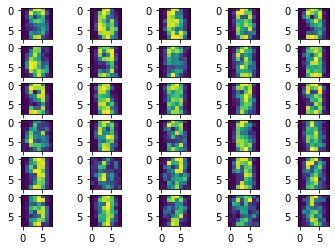

In [58]:
for i in range(1, 31):
    plt.subplot(6, 5, i)
    plt.imshow(rbm.reconstruct(train_x[i])[0].reshape((8,8)))
    
plt.savefig("all.jpg".format(i))

array([0.0079235 , 0.02141496, 0.11559182, 0.52253816, 0.75804883,
       0.30959022, 0.06595778, 0.0126926 , 0.00984416, 0.05898347,
       0.47394695, 0.78975375, 0.56226423, 0.52371865, 0.11433827,
       0.01147273, 0.00943261, 0.12955823, 0.77665895, 0.39810941,
       0.1450865 , 0.5795349 , 0.19010365, 0.01200694, 0.00992502,
       0.35101196, 0.87622487, 0.27780322, 0.25833197, 0.69810773,
       0.30643175, 0.00825925, 0.00676862, 0.40721919, 0.7925035 ,
       0.23958386, 0.37404982, 0.82733443, 0.4199824 , 0.00861796,
       0.01036516, 0.17764217, 0.57644659, 0.12959171, 0.32487688,
       0.81949382, 0.31087036, 0.00855142, 0.0064929 , 0.04528877,
       0.4015743 , 0.29015154, 0.6100973 , 0.65465347, 0.11661395,
       0.01100556, 0.00942606, 0.01412224, 0.12715962, 0.59056121,
       0.81214265, 0.29721402, 0.03807654, 0.01385331])